##### Notino Test Assigment
###### Author: Klara Martinaskova
###### Task: Evaluate an AB test of the recommendation algorithm


In [24]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import os
import csv


In [25]:
# open CSV files
with open('clients_final.csv', 'r') as file:
    csv_clients = csv.reader(file)
with open('orders_final.csv', 'r') as file:
    csv_orders = csv.reader(file)

In [26]:

print(type(csv_clients))
print(type(csv_orders))

<class '_csv.reader'>
<class '_csv.reader'>


In [27]:
# open csv file ans save as dataframe
df_clients = pd.read_csv('clients_final.csv')
df_orders = pd.read_csv('orders_final.csv')

print(type(df_clients))
print(type(df_orders))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
print(df_clients.head())

         date country               sessionID            clientID  isNew  \
0  2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff      0   
1  2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486      0   
2  2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff      1   
3  2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9      1   
4  2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18      1   

   abUser  orderNumber  
0     1.0          NaN  
1     1.0          NaN  
2     1.0          NaN  
3     1.0          NaN  
4     1.0          NaN  


In [29]:
df_clients = pd.read_csv('clients_final.csv',encoding="cp1250", sep=",", low_memory=False)

In [30]:
print(df_clients.head())

         date country               sessionID            clientID  isNew  \
0  2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff      0   
1  2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486      0   
2  2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff      1   
3  2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9      1   
4  2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18      1   

   abUser  orderNumber  
0     1.0          NaN  
1     1.0          NaN  
2     1.0          NaN  
3     1.0          NaN  
4     1.0          NaN  


In [31]:
abUser1 = df_clients[df_clients['abUser']==1.0]
print(abUser1.shape)
print(abUser1['abUser'].count())
print((df_clients['abUser']==1.0))

(2769600, 7)
2769600
0           True
1           True
2           True
3           True
4           True
           ...  
5562167     True
5562168    False
5562169    False
5562170    False
5562171     True
Name: abUser, Length: 5562172, dtype: bool


In [32]:
sum_reco = (df_clients['abUser']==1.0).sum()
sum_control = (df_clients['abUser']==2.0).sum()
sum_99 = (df_clients['abUser']).isna().sum()
# print only unique values in abUser
print(df_clients['abUser'].unique())
print(sum_reco)
print(sum_control)
print(sum_99)
print(sum_reco + sum_control + sum_99)
print(df_clients.shape)

[ 1.  2. nan]
2769600
2770134
22438
5562172
(5562172, 7)


In [33]:
abUser_unique = df_clients['abUser'].unique() # 99 is not present here (just NaN)
txt = "Unique values in abUser: {}"
print(txt.format(abUser_unique))

Unique values in abUser: [ 1.  2. nan]


In [34]:
# o	Is the ratio of users in the reco group and users in the test group really 50:50? 
# reco group: abUser   = 2
# control group: abUser = 1

reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
control_count = df_clients['abUser'][df_clients['abUser']==2].count()
other_count = (df_clients['abUser']).isna().sum()

print(reco_count)
print(control_count)
print(other_count)
print(reco_count + control_count + other_count) # check sum of all
print(df_clients.shape)





2769600
2770134
22438
5562172
(5562172, 7)


In [35]:
# •	What about the users with an unassigned group? Bambino thinks the test is fine if their share is below 0.5%. 
reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
control_count = df_clients['abUser'][df_clients['abUser']==2].count()
other_count = (df_clients['abUser']).isna().sum()

percent = other_count/((reco_count + control_count + other_count))*100


if percent < 0.5:
    print("The test is fine, share is below 0.5%.")
    print("Percent of users with an unassigned group: {:.2f}%".format(percent))
else:
    print("The test is not fine, share is {:.2f}%".format(percent))


The test is fine, share is below 0.5%.
Percent of users with an unassigned group: 0.40%


In [36]:
# group by date
groupt_date = df_clients.groupby('date')
print(groupt_date.head())

               date country               sessionID            clientID  \
0        2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff   
1        2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486   
2        2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff   
3        2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9   
4        2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18   
...             ...     ...                     ...                 ...   
4850093  2023-06-14      CH  49199f9a17a17.snx39iox   69a1a9348.49199f9   
4850094  2023-06-14      CH  49199f9a19441.mx3mzhbg  4188a94139.49199fx   
4850095  2023-06-14      CH  49199f96a94xx.1yp1ge6r   a3974a4979.49xf99   
4850096  2023-06-14      CH  49199f96x9371.nrd9r8tv  4319f86691.49198x1   
4850097  2023-06-14      CH   49199f96f1ff9.vkrwehp   x46134166.49199f9   

         isNew  abUser  orderNumber  
0            0     1.0          NaN  
1            0     1.0 

In [37]:
# how many order num is Nan
print(df_clients['orderNumber'].isna().sum())

5289905


In [38]:
# o	Can you test it by an appropriate statistical test? 
# o	Do you prefer to test it on a daily basis, or to run one test for the whole period? 
# o	If you run multiple tests, do you need all of them to have positive results to verify the 50:50 distribution hypothesis? 


In [39]:
print(df_clients.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
5562167    False
5562168    False
5562169    False
5562170    False
5562171    False
Length: 5562172, dtype: bool


In [40]:
# new_df = df.dropna() # new dataframe, which doesnot change the original dataframe and does not contain NaN values
# df['Date'] = pd.to_datetime(df['Date']) # convert column Date to datetime
# print(df.duplicated())
# df.drop_duplicates(inplace = True)


In [41]:
# •	What about the orders that are not in GA data? What is their share? How do you propose to handle them?
df_join = df_clients.merge(df_orders, on='orderNumber', how='inner') # inner join
df_join_count = df_join['orderNumber'].count() # number of common orders in both dataframes
df_clients_count = df_clients['orderNumber'].count() # number of orders in df_clients
share = 1-(df_join_count/df_clients_count) # share of orders that are not in GA data

print("Share of orders that are not in GA data: {:.2f}%".format(share*100))

Share of orders that are not in GA data: 8.76%


In [42]:
print(df_join.head())

       date_x country_x               sessionID            clientID  isNew  \
0  2023-05-17        CH   4917af16fx34x.n6c6bdy  4f17a76x4f.4917af9      0   
1  2023-05-17        CH   4917af184a73x.esah47g   74x747x34.49364ax      0   
2  2023-05-17        CH  4917af1887a37.axhmhla9   7xfx73f47.49xf9a1      0   
3  2023-05-17        CH  491764771a143.uf1pn9mb  478786336a.48f641a      0   
4  2023-05-17        CH  4917af6afxxfa.3zn8xizx   7499371f7.4917aa1      0   

   abUser   orderNumber country_y      date_y  quantity   revenue  
0     2.0  1.142808e+09        CH  2023-05-17         1    8.3551  
1     1.0  1.142808e+09        CH  2023-05-17         9  107.4632  
2     1.0  1.142808e+09        CH  2023-05-17         3   14.1620  
3     1.0  1.142810e+09        CH  2023-05-17        26  140.9439  
4     1.0  1.142808e+09        CH  2023-05-17         2   16.4306  


In [43]:
#•	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

# reco group =  abUser == 1
# control group = abUser == 2

reco_revenue_mean = df_join['revenue'][df_join['abUser']==1].mean() 
control_revenue_mean = df_join['revenue'][df_join['abUser']==2].mean()

print(reco_revenue_mean)
print(control_revenue_mean)

if reco_revenue_mean > control_revenue_mean:
    print("The reco group earns, on average, a greater revenue.")
else:
    print("The reco group does not earn, on average, a greater revenue.")

print("The average revenue of reco group is {:.2f} and the average revenue of control group is {:.2f}".format(reco_revenue_mean, control_revenue_mean))



66.9124707396017
41.82435776019209
The reco group earns, on average, a greater revenue.
The average revenue of reco group is 66.91 and the average revenue of control group is 41.82


In [44]:
# Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?


In [78]:
reco_quantity_mean = df_join['quantity'][df_join['abUser']==1].mean() 
ceontrol_quantity_mean = df_join['quantity'][df_join['abUser']==2].mean()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

# almost same, need visualization of distribution

#df_join.loc[df_join[df_join['abUser']==1].quantity]


4.358408478354907
4.350676699239234


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


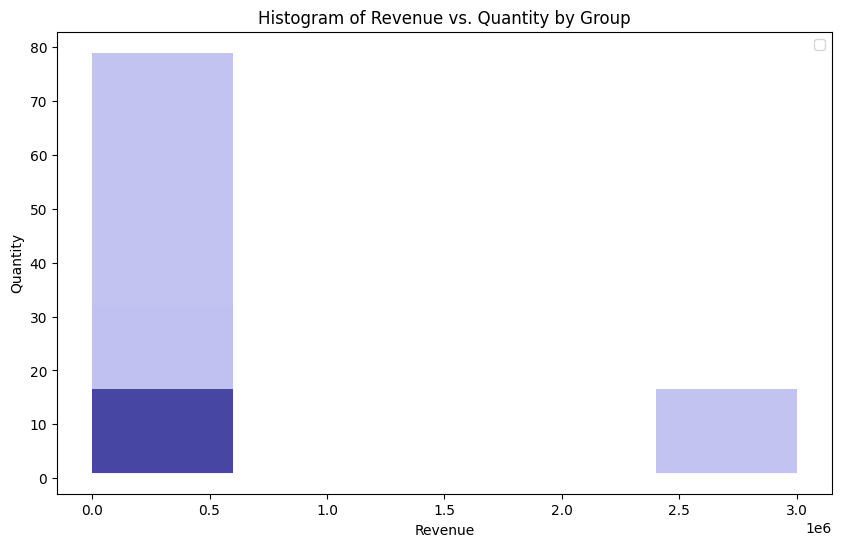

In [54]:
# Filter the DataFrame for group == 1 and group == 2
group_1_data = df_join[df_join['abUser'] == 1]
group_2_data = df_join[df_join['abUser'] == 2]

# Create histograms for each group using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=group_1_data, x='revenue', y='quantity', bins=5, color='blue', label='Group 1')
sns.histplot(data=group_2_data, x='revenue', y='quantity', bins=5, color='red', label='Group 2')

# Customize the plot
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.title('Histogram of Revenue vs. Quantity by Group')
plt.legend(loc='upper right')

# Show the plot
plt.show()






<AxesSubplot:ylabel='Frequency'>

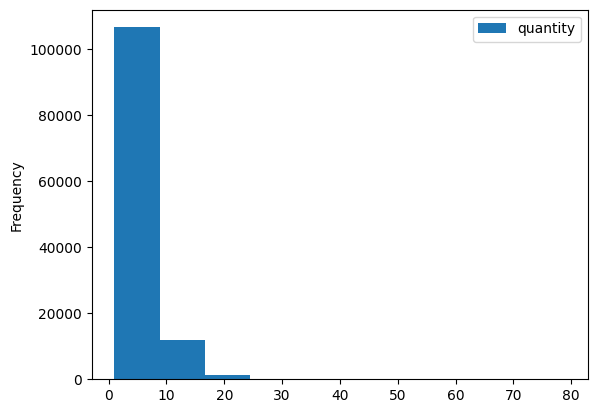

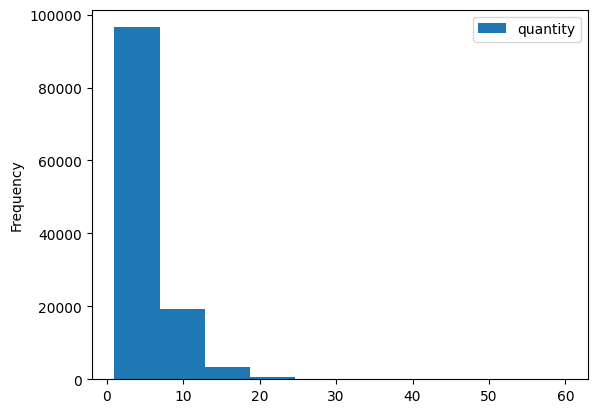

In [ ]:
#df.plot(x='game', y=['points_for', 'points_against'])
df_join_reco = df_join[df_join['abUser']==1]
df_join_control = df_join[df_join['abUser']==2]

df_join_reco.plot(x='revenue', y=['quantity'],kind  = "hist")
df_join_control.plot(x='revenue', y=['quantity'], kind = "hist")


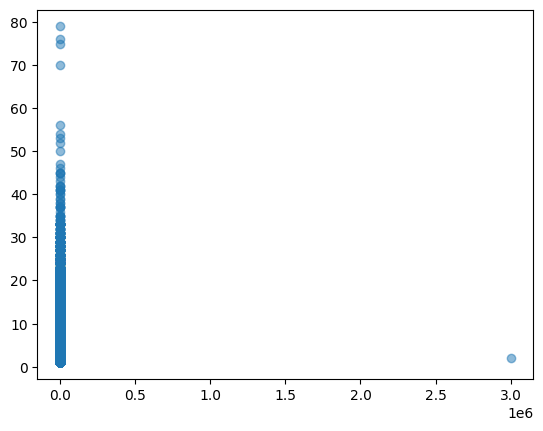

In [65]:
group_1_data = df_join[df_join['abUser'] == 1]

# Create a scatter plot with 'revenue' on the x-axis and 'quantity' on the y-axis
plt.scatter(group_1_data['revenue'], group_1_data['quantity'], alpha=0.5)

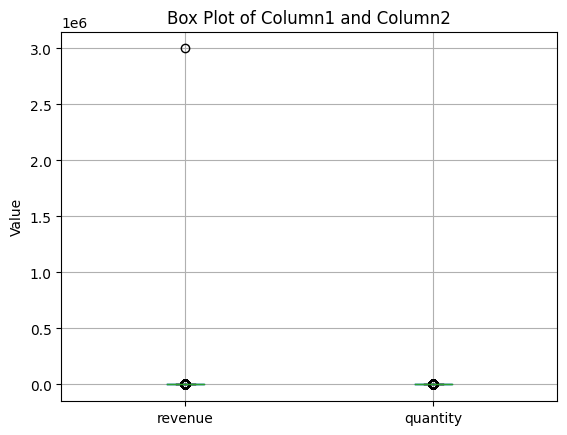

In [ ]:
df_join.boxplot(column=["revenue", "quantity"])
plt.ylabel("Value")
plt.title("Box Plot of Column1 and Column2")
plt.show()

(array([2.5049e+04, 3.1337e+04, 2.0186e+04, 1.5132e+04, 9.8250e+03,
        6.2400e+03, 3.8660e+03, 2.4700e+03, 1.6030e+03, 1.1480e+03,
        7.7700e+02, 5.7600e+02, 4.2000e+02, 2.9900e+02, 2.1900e+02,
        1.8800e+02, 1.2700e+02, 1.1400e+02, 8.6000e+01, 7.1000e+01,
        4.9000e+01, 3.7000e+01, 3.7000e+01, 4.0000e+01, 3.0000e+01,
        3.1000e+01, 1.8000e+01, 1.6000e+01, 1.2000e+01, 1.0000e+01,
        1.0000e+01, 1.5000e+01, 7.0000e+00, 1.5000e+01, 6.0000e+00,
        5.0000e+00, 9.0000e+00, 1.3000e+01, 6.0000e+00, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

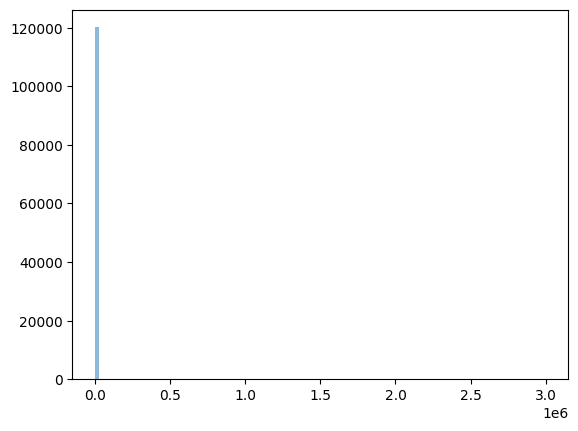

In [67]:
plt.hist(x = df_join['revenue'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['revenue'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')

(array([2.2868e+04, 2.2198e+04, 0.0000e+00, 1.8178e+04, 0.0000e+00,
        1.4258e+04, 1.0910e+04, 0.0000e+00, 8.1030e+03, 0.0000e+00,
        5.9640e+03, 4.3070e+03, 0.0000e+00, 3.2370e+03, 0.0000e+00,
        2.5490e+03, 1.8410e+03, 0.0000e+00, 1.2900e+03, 0.0000e+00,
        1.0250e+03, 0.0000e+00, 7.8700e+02, 5.7900e+02, 0.0000e+00,
        4.4800e+02, 0.0000e+00, 3.2900e+02, 2.4900e+02, 0.0000e+00,
        2.0000e+02, 0.0000e+00, 1.6900e+02, 1.2300e+02, 0.0000e+00,
        1.0600e+02, 0.0000e+00, 7.1000e+01, 6.6000e+01, 0.0000e+00,
        5.4000e+01, 0.0000e+00, 4.7000e+01, 0.0000e+00, 4.8000e+01,
        2.5000e+01, 0.0000e+00, 2.0000e+01, 0.0000e+00, 1.6000e+01,
        9.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00, 7.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 5.0000e+00,
        0.0000e+00, 9.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.00

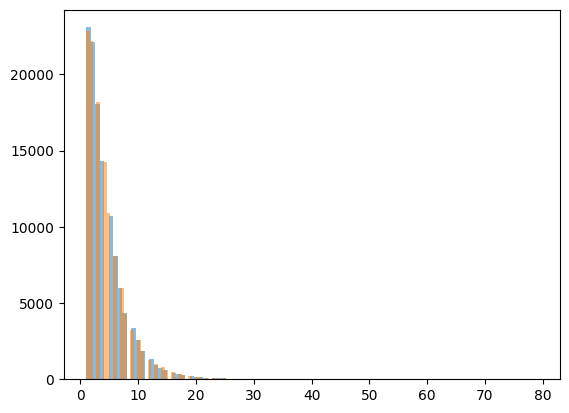

In [66]:
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')

In [72]:
groubydfjoin = df_join.groupby(["revenue"]).count()

print(len(df_join))
print(len(groubydfjoin))
print(df_join.groupby(["revenue"]).count())


248419
117191
               date_x  country_x  sessionID  clientID  isNew  abUser  \
revenue                                                                
-4.230000e-02       1          1          1         1      1       1   
-2.110000e-02       1          1          1         1      1       1   
-1.000000e-02       1          1          1         1      1       1   
-4.700000e-03       1          1          1         1      1       1   
-4.600000e-03       1          1          1         1      1       1   
...               ...        ...        ...       ...    ...     ...   
 1.251575e+03       1          1          1         1      1       0   
 1.398773e+03       1          1          1         1      1       1   
 1.406341e+03       1          1          1         1      1       1   
 1.527955e+03       1          1          1         1      1       1   
 3.000000e+06       1          1          1         1      1       1   

               orderNumber  country_y  date_y  qu

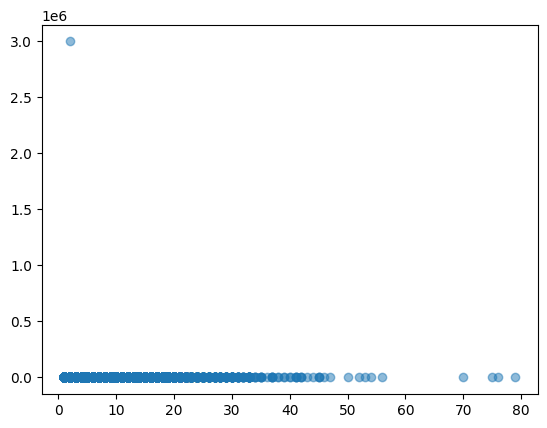

In [74]:
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5)